In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [5]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [6]:
x_train.shape

(404, 13)

In [7]:
#Normalising the data

In [8]:
mean = x_train.mean(axis = 0)
std = x_train.std(axis = 0)

In [9]:
x_train-=mean
x_train/=std
x_test-=mean
x_test/=std

In [36]:
def build_model():
  model = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(64,activation='relu',input_shape=((x_train.shape[1],))),
                                     tf.keras.layers.Dense(64,activation = 'relu'),
                                     tf.keras.layers.Dense(1)                      
  ])
  model.compile(loss = 'mse',optimizer = 'rmsprop',metrics = ['mean_absolute_error'])
  return model

In [11]:
import numpy as np

In [19]:
k = 4
num_of_val_samples = len(x_train)//k  # TO get the floor number of sample in each set

In [20]:
num_epochs = 100
scores = []

In [37]:
for i in range(k):
  print('Starting {}th validation '.format(i))
  val_data = x_train[i*num_of_val_samples:(i+1)*num_of_val_samples]
  val_target = y_train[i*num_of_val_samples:(i+1)*num_of_val_samples]
  x_partial_train = np.concatenate([x_train[:i*num_epochs],x_train[(i+1)*num_of_val_samples:]],axis = 0)
  y_partial_train = np.concatenate([y_train[:i*num_epochs],y_train[(i+1)*num_of_val_samples:]],axis = 0)
  network = build_model()
  network.fit(x_partial_train,y_partial_train,epochs = 100,batch_size = 1,verbose=0)
  val_mse,val_mae = network.evaluate(val_data,val_target)
  scores.append(val_mae)

Starting 0th validation 
4/4 [==============================] - 0s 5ms/step - loss: 9.6591 - mean_absolute_error: 2.3048
Starting 1th validation 
4/4 [==============================] - 0s 3ms/step - loss: 3.4559 - mean_absolute_error: 1.2696
Starting 2th validation 
4/4 [==============================] - 0s 3ms/step - loss: 4.8873 - mean_absolute_error: 1.2404
Starting 3th validation 
4/4 [==============================] - 0s 3ms/step - loss: 2.4062 - mean_absolute_error: 1.2274


In [30]:
avg_score = np.mean(scores)

In [31]:
print(avg_score)

2.3458733558654785


In [32]:
#increasing umber of epochs and storing all the MAEs

In [38]:
num_epochs = 500
all_mae_history = []
scores_2 = []
for i in range(k):
  print('Starting {}th validation '.format(i))
  val_data = x_train[i*num_of_val_samples:(i+1)*num_of_val_samples]
  val_target = y_train[i*num_of_val_samples:(i+1)*num_of_val_samples]
  x_partial_train = np.concatenate([x_train[:i*num_epochs],x_train[(i+1)*num_of_val_samples:]],axis = 0)
  y_partial_train = np.concatenate([y_train[:i*num_epochs],y_train[(i+1)*num_of_val_samples:]],axis = 0)
  network = build_model()
  history = network.fit(x_partial_train,y_partial_train,epochs = num_epochs,batch_size = 1,verbose=0,validation_data = (val_data,val_target))
  mae_history = history.history['val_mean_absolute_error']
  all_mae_history.append(mae_history)

Starting 0th validation 
Starting 1th validation 
Starting 2th validation 
Starting 3th validation 


In [39]:
all_mae_history

[[4.090298652648926,
  3.0442609786987305,
  2.735837936401367,
  2.6467552185058594,
  2.7084617614746094,
  2.461235523223877,
  2.18385910987854,
  2.2651586532592773,
  2.4461255073547363,
  2.3675777912139893,
  2.03940749168396,
  2.1778526306152344,
  2.651682138442993,
  2.0779359340667725,
  2.0621402263641357,
  2.13234543800354,
  2.0268747806549072,
  2.029832363128662,
  2.017221689224243,
  2.0089643001556396,
  2.2812681198120117,
  2.0075080394744873,
  1.8666530847549438,
  2.117577075958252,
  2.3721628189086914,
  1.9831409454345703,
  2.1408088207244873,
  2.0568113327026367,
  2.318519353866577,
  2.257514238357544,
  2.0196619033813477,
  2.002997398376465,
  2.2473883628845215,
  2.1068596839904785,
  2.0236904621124268,
  2.007352352142334,
  2.1648240089416504,
  1.9716405868530273,
  1.9691652059555054,
  2.0936172008514404,
  1.9796453714370728,
  1.8947069644927979,
  2.1466245651245117,
  2.172797918319702,
  1.936361312866211,
  1.9355502128601074,
  2.027

In [41]:
len(all_mae_history[0])

500

In [45]:
average_mae = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

In [46]:
average_mae

[3.7618874311447144,
 2.9133012294769287,
 2.6320632696151733,
 2.518669366836548,
 2.4416643381118774,
 2.4056228399276733,
 2.264614522457123,
 2.2683897018432617,
 2.288761854171753,
 2.245211899280548,
 2.079542428255081,
 2.06989786028862,
 2.271390676498413,
 2.173526108264923,
 2.0093238949775696,
 2.170183390378952,
 1.8886377215385437,
 1.964916318655014,
 1.8631296157836914,
 1.8315156400203705,
 1.9762739539146423,
 1.8978329598903656,
 1.8252740800380707,
 1.9155035018920898,
 1.9929739236831665,
 1.823352873325348,
 1.8535292446613312,
 1.935570865869522,
 1.8840221762657166,
 2.028767466545105,
 1.8448272347450256,
 1.8173312544822693,
 1.791092187166214,
 1.832844853401184,
 1.8358480334281921,
 1.7256229221820831,
 1.912578135728836,
 1.730900377035141,
 1.7359488904476166,
 1.6910810470581055,
 1.8265348970890045,
 1.7247637808322906,
 1.7314386367797852,
 1.7415854334831238,
 1.6303749680519104,
 1.6330550611019135,
 1.7205816507339478,
 1.6716512143611908,
 1.8336893

In [48]:
len(average_mae) #per epoch mae scores for all folds.

500

In [49]:
import matplotlib.pyplot as plt


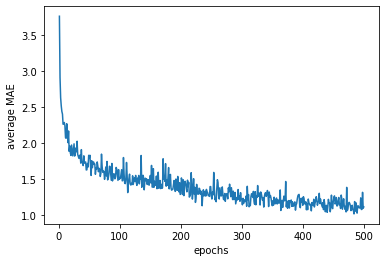

In [50]:
plt.plot(range(1,len(average_mae)+1),average_mae)
plt.xlabel('epochs')
plt.ylabel('average MAE')
plt.show()

In [51]:
#Obtaining a Smoothing curve using exponential weighting average

In [63]:
def smooth_curve(points,factor = 0.9):
  smoother_points = []
  for point in points:
    if smoother_points: #Checks for Null in Smooth points.
      previous = smoother_points[-1]
      smoother_points.append(previous*factor+point*(1-factor))
    else:
      smoother_points.append(point)
  return smoother_points

In [64]:
smoother_mae = smooth_curve(average_mae[10:])

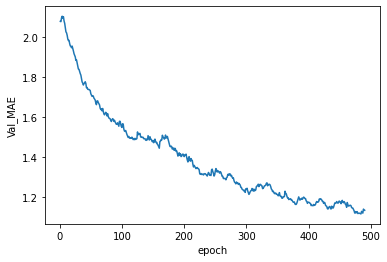

In [68]:
plt.plot(range(1,len(smoother_mae)+1),smoother_mae)
plt.xlabel('epoch')
plt.ylabel('Val_MAE')
plt.show()